In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sparshjain8287","key":"ec7b20617be61dd75d5c92c221b97e06"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d sshubam/insat3d-infrared-raw-cyclone-images-20132021

Dataset URL: https://www.kaggle.com/datasets/sshubam/insat3d-infrared-raw-cyclone-images-20132021
License(s): CC0-1.0


In [2]:
!unzip '/content/data_843.zip'

Archive:  /content/data_843.zip
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/101.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/102.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/106.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/111.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/112.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/115.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/118.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/119.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/128.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/25.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/27.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/28.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/30(1).jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/30.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/31.jpe

##First we visualise the data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.read_csv("/content/insat_3d_ds - Sheet.csv")

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [51]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/insat3d_ir_cyclone_ds"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in '/content/insat3d_ir_cyclone_ds'.
There are 0 directories and 133 images in '/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'.


In [53]:
os.mkdir("test_data")

FileExistsError: [Errno 17] File exists: 'test_data'

In [54]:
import os
import shutil

source = '/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'
destination = '/content/test_data'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles[133:]:

    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)


In [55]:
#Get the classes drammatically
import pathlib
data_dir=pathlib.Path("/content/insat3d_ir_cyclone_ds")
data_dir

PosixPath('/content/insat3d_ir_cyclone_ds')

In [56]:
#Let visualise our images
import random
def view_random_image(target_dir):
  target_folder=target_dir
  random_image=random.sample(os.listdir(target_folder),10)
  plt.figure(figsize=(10,10))
  for i in range(10):
    img=mpimg.imread(target_folder+"/"+random_image[i])
    plt.subplot(5,2,i+1)
    plt.imshow(img)
    plt.title(random_image[i])
    plt.axis("off");#Default axis is on

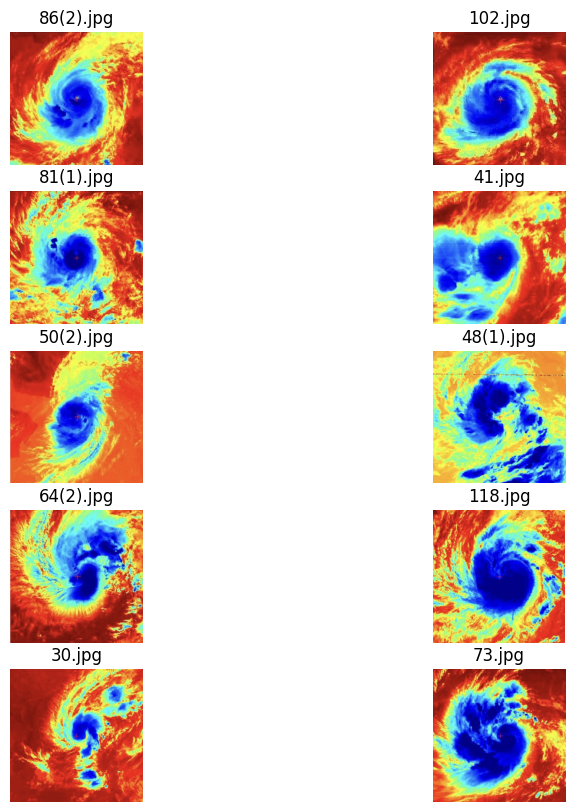

In [57]:
view_random_image("/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED")

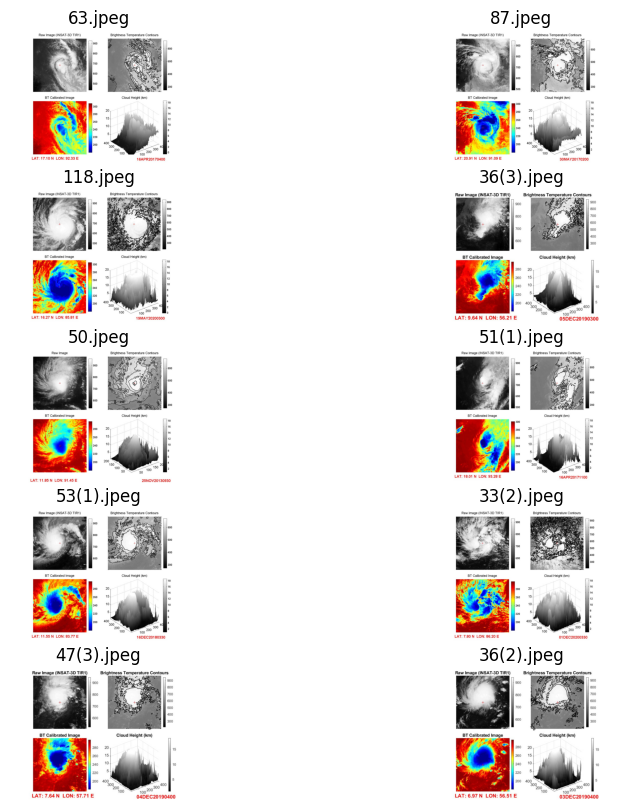

In [58]:
view_random_image("/content/insat3d_for_reference_ds/CYCLONE_DATASET")

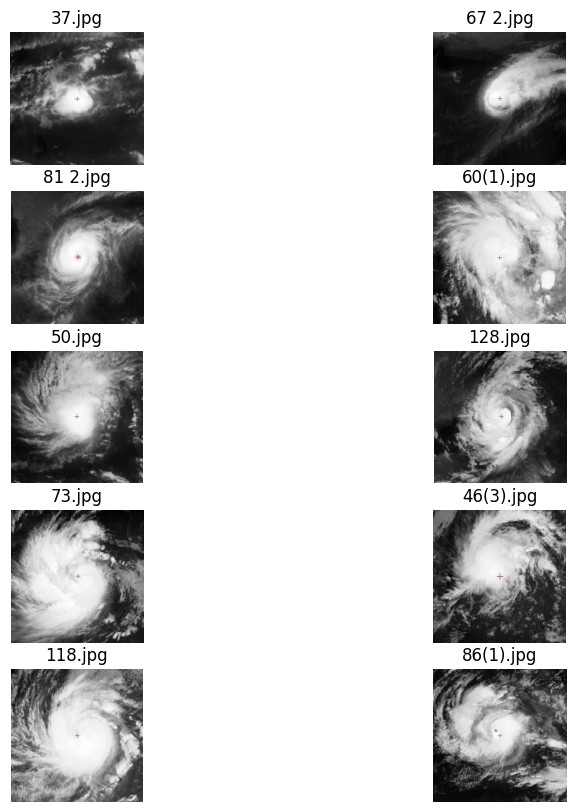

In [59]:
view_random_image("/content/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL")

#Preprocess the data

In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv("/content/insat_3d_ds - Sheet.csv")

In [61]:
train_dir="/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"
train_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='img_name',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode="raw"
                                             )


Found 133 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(


#Create a model

In [62]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
inputs=Input(shape=(256,256,3))
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(16,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y= Flatten()(y)
outputs=Dense(1,activation='linear')(y)
model_1=Model(inputs=inputs,outputs=outputs)

In [63]:
model_1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 256, 256, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256, 256, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_20 (ReLU)                 │ (None, 256, 256, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256, 256, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_21 (ReLU)                 │ (None, 256, 256, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128, 128, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_22 (ReLU)                 │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 128, 128, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_23 (ReLU)                 │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_24 (ReLU)                 │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_25 (ReLU)                 │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 64)     │             

 Total params: 1,778,961 (6.79 MB)

 Trainable params: 1,776,497 (6.78 MB)

 Non-trainable params: 2,464 (9.62 KB)

In [64]:
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mse"])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=30,mode='min')

In [65]:
history_1=model_1.fit(train_data,
                      epochs=100,callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - loss: 3890.1956 - mse: 3404.8584
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 824ms/step - loss: 2965.4639 - mse: 2477.5964
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 810ms/step - loss: 1777.1892 - mse: 1287.8223
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 798ms/step - loss: 1343.2716 - mse: 853.5106
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 786ms/step - loss: 1126.6304 - mse: 637.1894
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 762ms/step - loss: 827.9623 - mse: 339.2665
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 756ms/step - loss: 786.7681 - mse: 299.0818
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 763ms/step - loss: 846.1429 - mse: 359.6389
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 824ms/step - loss: 743.3080 - mse: 258.0819
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 770ms/step - loss: 683.5047 - mse: 199.6077
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 783ms/step - loss: 681.1958 - mse: 198.7244
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 798ms/step - loss: 648.2458 - mse: 16

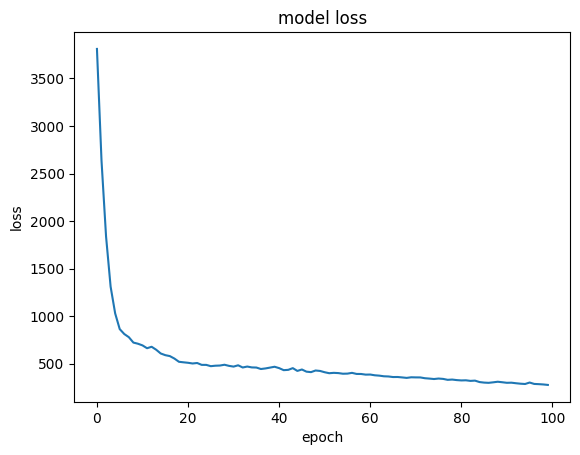

In [66]:
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [67]:
def load_and_prep_image(filename, img_shape=256):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [68]:
def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


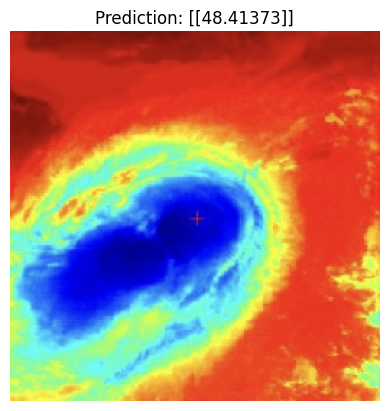

In [69]:
pred_and_plot(model_1,"/content/test_data/44(1).jpg")

1/1 [==============================] - 0s 20ms/step


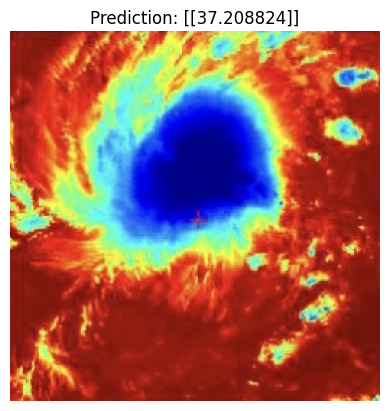

In [ ]:
pred_and_plot(model_1,"/content/test_data/36(2).jpg")

1/1 [==============================] - 0s 28ms/step


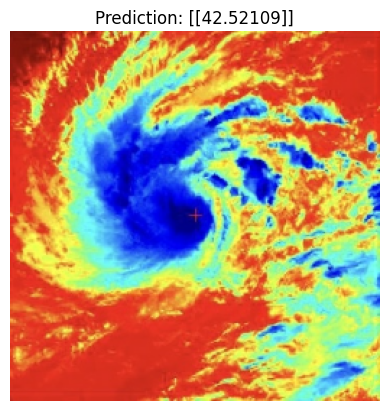

In [ ]:
pred_and_plot(model_1,"/content/test_data/47(2).jpg")

1/1 [==============================] - 0s 19ms/step


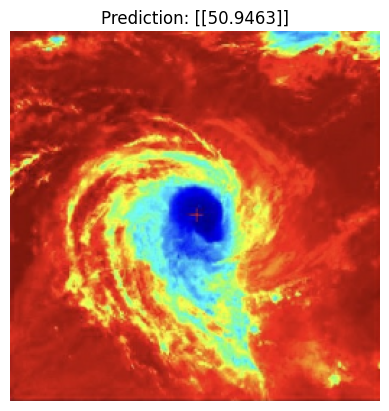

In [ ]:
pred_and_plot(model_1,"/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/69.jpg")

1/1 [==============================] - 0s 28ms/step


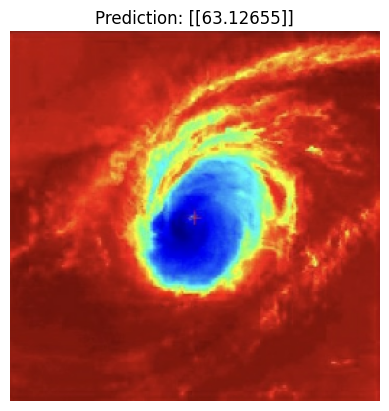

In [ ]:
pred_and_plot(model_1,"/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/85(2).jpg")

1/1 [==============================] - 0s 20ms/step


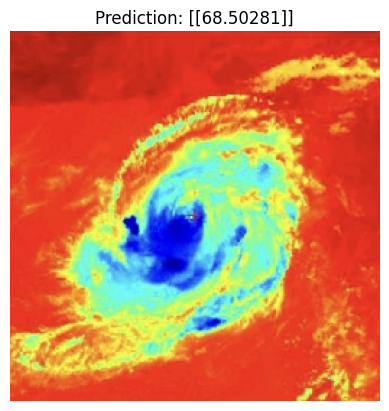

In [ ]:
pred_and_plot(model_1,"/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/94.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


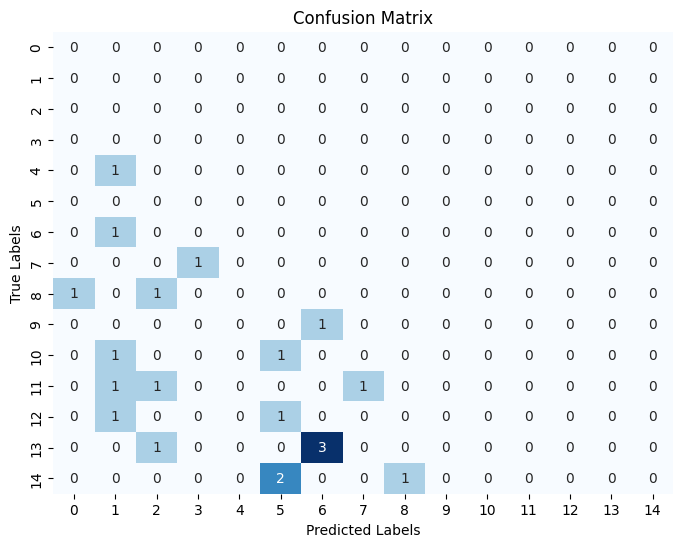

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
train = pd.read_csv("/content/insat_3d_ds - Sheet.csv")

# Get a subset of image names for the confusion matrix (e.g., the first 20)
image_names = train['img_name'][:20].tolist()

# Create empty lists for true and predicted labels
y_true = []
y_pred = []

# Loop through the selected images
for image_name in image_names:
    # Get the true label from the dataframe
    true_label = train.loc[train['img_name'] == image_name, 'label'].values[0]
    y_true.append(true_label)

    # Construct the full image path
    image_path = os.path.join("/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED", image_name)

    # Load and prepare the image
    img = load_and_prep_image(image_path)

    # Make a prediction
    pred = model_1.predict(tf.expand_dims(img, axis=0))

    # Append the predicted label
    y_pred.append(np.round(pred[0][0]))  # Assuming your model outputs a single value



# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [72]:
model_1.save('model@.keras')